In [2]:
import cv2, os, glob
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import SVG

from keras.layers import Conv2D, Input, Activation
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.utils.vis_utils import model_to_dot
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from skimage.transform import pyramid_expand
from Subpixel import Subpixel
from DataGenerator import DataGenerator

Using TensorFlow backend.
C:\Users\user\Anaconda3\envs\opensource\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\envs\opensource\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\envs\opensource\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\envs\openso

In [3]:
base_path = 'C:/Users/user/Desktop/OpenSource/project/dataset/celeba-dataset/processed'

x_train_list = sorted(glob.glob(base_path + '/' + 'x_train' + '/' + '*'))
x_val_list = sorted(glob.glob(base_path + '/'  + 'x_val' + '/' + '*'))

# x_train_list = sorted([os.path.abspath(files) for root, dirs, files in os.walk(base_path + '/' + 'x_train')])
# x_val_list = sorted([os.path.abspath(files) for root, dirs, files in os.walk(base_path + '/' + 'x_val')])

# print(x_train_list)
print(len(x_train_list), len(x_val_list))
print(x_train_list[0])

1586 201
C:/Users/user/Desktop/OpenSource/project/dataset/celeba-dataset/processed/x_train\000065.npy


(44, 44, 3) (44, 44, 3)


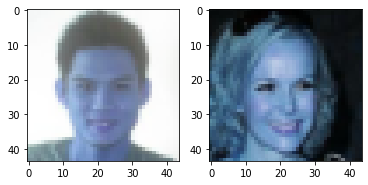

In [4]:
x1 = np.load(x_train_list[0])
x2 = np.load(x_val_list[0])

print(x1.shape, x2.shape)
# print(x1.shape)

plt.subplot(1, 2, 1)
plt.imshow(x1)
plt.subplot(1, 2, 2)
plt.imshow(x2)

In [5]:
train_gen = DataGenerator(list_IDs=x_train_list, labels=None, batch_size=16, dim=(44,44), n_channels=3, n_classes=None, shuffle=True)

val_gen = DataGenerator(list_IDs=x_val_list, labels=None, batch_size=16, dim=(44,44), n_channels=3, n_classes=None, shuffle=False)

In [6]:
upscale_factor = 4

inputs = Input(shape=(44, 44, 3))

net = Conv2D(filters=64, kernel_size=5, strides=1, padding='same', activation='relu')(inputs)
net = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = Conv2D(filters=upscale_factor**2, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = Subpixel(filters=3, kernel_size=3, r=upscale_factor, padding='same')(net)
outputs = Activation('relu')(net)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')

# intermediate_layer_model = Model(inputs = inputs, outputs=model.layers[4].output)
# model.compile(optimizer='adam', loss='mse')
# if x1.ndim == 3:
#     x1 = np.expand_dims(x1, axis = 0)
# feature_maps = intermediate_layer_model.predict(x1)
# # feature_maps = model.predict(x1)
# # print(feature_maps.shape)
# # plot all 16 maps in an 4x4 squares
# square = 4
# ix = 1
# plt.figure(figsize=(30,30))
# for _ in range(square):
#    for _ in range(square):
#       ax = plt.subplot(square, square, ix)
#       ax.set_xticks([])
#       ax.set_yticks([])

#       plt.imshow(feature_maps[0, :, :, ix-1])
#       ix += 1
# # show the figure
# plt.show()

# # print(feature_maps)
model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 44, 44, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        4864      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 32)        18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 16)        4624      
_________________________________________________________________
subpixel_1 (Subpixel)        (None, 176, 176, 3)       6960      
_________________________________________________________________
activation_1 (Activation)    (None, 176, 176, 3)       0         
Total 

In [6]:
# history = model.fit_generator(train_gen, validation_data=val_gen, epochs=10, verbose=1, callbacks=[
#     ModelCheckpoint('C:/Users/user/Desktop/OpenSource/project/dataset/hentai_decensor_model/model.h5', monitor='val_loss', verbose=1, save_best_only=True)
# ])

In [5]:
# model.save_weights("C:/Users/user/Desktop/OpenSource/project/dataset/hentai_decensor_model/model.h5")
model.load_weights("C:/Users/user/Desktop/OpenSource/project/dataset/hentai_decensor_model/model.h5")
# loaded_model = load_model('C:/Users/user/Desktop/OpenSource/project/dataset/hentai_decensor_model/model.h5', custom_objects={'Subpixel' : Subpixel})
# print(SVG(model_to_dot(loaded_model, show_shapes=True).create(prog='dot', format='svg')))

In [6]:
x_test_list = sorted(glob.glob(os.path.join(base_path, 'x_test', '*.npy')))
y_test_list = sorted(glob.glob(os.path.join(base_path, 'y_test', '*.npy')))

print(len(x_test_list), len(y_test_list))
print(x_test_list[0])

202 202
C:/Users/user/Desktop/OpenSource/project/dataset/celeba-dataset/processed\x_test\182645.npy


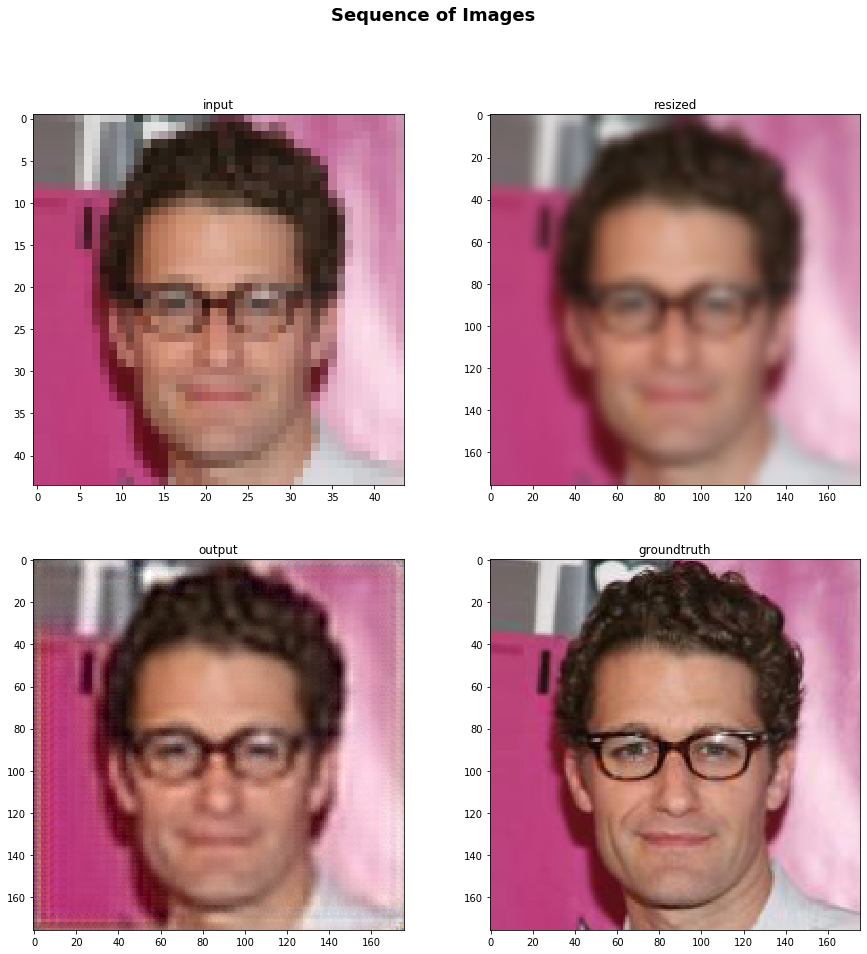

In [8]:
# test_idx = 21
test_set_length = len(x_test_list)
test_idx = int(np.random.choice(test_set_length, 1))

x1_test = np.load(x_test_list[test_idx])
x1_test_resized = pyramid_expand(x1_test, 4, multichannel = True)
y1_test = np.load(y_test_list[test_idx])
y_pred = model.predict(x1_test.reshape((1, 44, 44, 3)))

x1_test = (x1_test * 255).astype(np.uint8)
x1_test_resized = (x1_test_resized * 255).astype(np.uint8)
y1_test = (y1_test * 255).astype(np.uint8)
y_pred = np.clip(y_pred.reshape((176, 176, 3)), 0, 1)

x1_test = cv2.cvtColor(x1_test, cv2.COLOR_BGR2RGB)
x1_test_resized = cv2.cvtColor(x1_test_resized, cv2.COLOR_BGR2RGB)
y1_test = cv2.cvtColor(y1_test, cv2.COLOR_BGR2RGB)
y_pred = cv2.cvtColor(y_pred, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(2,2)
fig.set_size_inches(15,15)
title_list = ['input', 'resized', 'output', 'groundtruth']
image_list = [x1_test, x1_test_resized, y_pred, y1_test]
for idx in range(4):
    i_row = math.floor(idx / 2.0)
    i_col = idx % 2
    ax[i_row][i_col].imshow(image_list[idx])
    ax[i_row][i_col].set_title(title_list[idx])
plt.suptitle('Sequence of Images', fontsize=18, fontweight='bold')
plt.show()

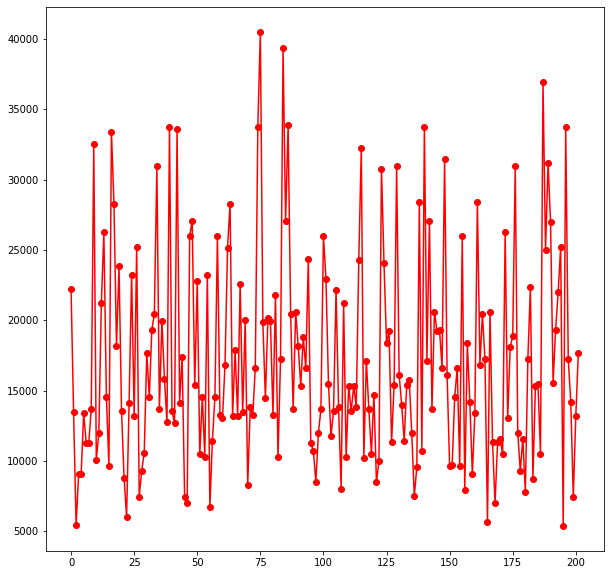

In [13]:
test_set_length = len(x_test_list)
x_arr = np.arange(0, test_set_length)
error_list = list()

for count in range(test_set_length):   
    test_idx = int(np.random.choice(test_set_length, 1))

    x1_test = np.load(x_test_list[test_idx])
    x1_test_resized = pyramid_expand(x1_test, 4, multichannel = True)
    y1_test = np.load(y_test_list[test_idx])
    y_pred = model.predict(x1_test.reshape((1, 44, 44, 3)))

    x1_test = (x1_test * 255).astype(np.uint8)
    x1_test_resized = (x1_test_resized * 255).astype(np.uint8)
    y1_test = (y1_test * 255).astype(np.uint8)
    y_pred = np.clip(y_pred.reshape((176, 176, 3)), 0, 1)

    error_list.append(np.square(y_pred - y1_test).mean(axis = None))
    
    x1_test = cv2.cvtColor(x1_test, cv2.COLOR_BGR2RGB)
    x1_test_resized = cv2.cvtColor(x1_test_resized, cv2.COLOR_BGR2RGB)
    y1_test = cv2.cvtColor(y1_test, cv2.COLOR_BGR2RGB)
    y_pred = cv2.cvtColor(y_pred, cv2.COLOR_BGR2RGB)
    
    
plt.figure(figsize=(10,10))
plt.plot(x_arr, error_list, color = 'red', marker = 'o')


In [ ]:
test_set_length = len(x_test_list)
test_idx = int(np.random.choice(test_set_length, 1))

x1_test = np.load(x_test_list[test_idx])
x1_test_resized = pyramid_expand(x1_test, 4, multichannel = True)
y1_test = np.load(y_test_list[test_idx])
y_pred = model.predict(x1_test.reshape((1, 44, 44, 3)))

x1_test = (x1_test * 255).astype(np.uint8)
x1_test_resized = (x1_test_resized * 255).astype(np.uint8)
y1_test = (y1_test * 255).astype(np.uint8)
y_pred = np.clip(y_pred.reshape((176, 176, 3)), 0, 1)

x1_test = cv2.cvtColor(x1_test, cv2.COLOR_BGR2RGB)
x1_test_resized = cv2.cvtColor(x1_test_resized, cv2.COLOR_BGR2RGB)
y1_test = cv2.cvtColor(y1_test, cv2.COLOR_BGR2RGB)
y_pred = cv2.cvtColor(y_pred, cv2.COLOR_BGR2RGB)

In [17]:
image = cv2.imread('C:/Users/user/Desktop/jihoAhn.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(image_rgb)